In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy import optimize
import researchpy as rp
import matplotlib.pyplot as plt

# Zadanie na 3

In [120]:
# Wczytywanie danych
headings = ['season',
            'age',
            'diseases',
            'accident',
            'surgery',
            'fever',
            'alcohol',
            'smoking',
            'sittingHours',
            'diagnosis']

data = pd.read_csv('../dane/fertility_Diagnosis.data', names=headings)

In [121]:
# Wyznaczanie dominanty dla cech jakościowych
qualityData = data[['season', 'diseases', 'accident', 'surgery', 'fever', 'alcohol', 'smoking', 'diagnosis']]
qualityData.mode()

season  diseases  accident  surgery  fever  alcohol  smoking diagnosis
0   -0.33         1         0        1      0      1.0       -1         N

In [122]:
# Wyznaczanie mediany, minimum i maksimum dla cech ilościowych
quantityData = data[['age', 'sittingHours']]
quantityData.median()

age             0.67
sittingHours    0.38
dtype: float64

In [123]:
quantityData.min()

age             0.50
sittingHours    0.06
dtype: float64

In [124]:
quantityData.max()

age             1.0
sittingHours    1.0
dtype: float64

In [125]:
# Wyznaczanie współczynnika korelacji Pearsona
correlation = quantityData.corr()
correlation

age  sittingHours
age           1.000000     -0.442452
sittingHours -0.442452      1.000000

In [126]:
# Zaokrąglanie wieku do pełnych lat
age = (quantityData.loc[:, 'age'] + 1) * 18
age = age.round()
age

0     30.0
1     35.0
2     27.0
3     32.0
4     30.0
      ... 
95    30.0
96    29.0
97    30.0
98    30.0
99    30.0
Name: age, Length: 100, dtype: float64

In [127]:
# Obliczanie częstotliwości wystąpień każdego wieku
bins = age.value_counts()
bins

28.0    28
30.0    27
32.0    17
33.0     7
27.0     7
29.0     5
35.0     4
31.0     2
36.0     2
34.0     1
Name: age, dtype: int64

Text(0.5, 1.0, 'Histogram wieku osób poddanych badaniu')

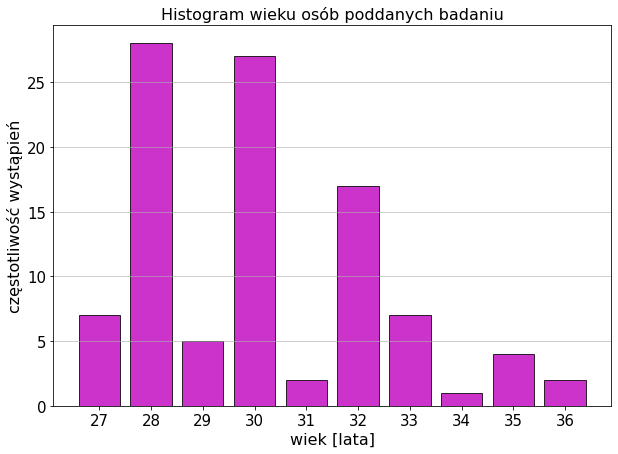

In [128]:
# Rysowanie histogramu wieku
plt.figure(figsize=(10,7))
plt.bar(bins.index, bins.values, alpha=0.8, color="m", edgecolor="k")
plt.xticks(bins.index) 
plt.grid(axis='y', alpha=0.75)
plt.xlabel("wiek [lata]", FontSize='16')
plt.ylabel("częstotliwość wystąpień", FontSize='16')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Histogram wieku osób poddanych badaniu", FontSize='16')

In [129]:
# Zaokrąglanie czasu spędzanego przed komputerem do pełnych godzin
hours = quantityData.loc[:, 'sittingHours'] * 16
hours = np.round(hours)
hours

0     14.0
1      5.0
2      8.0
3      6.0
4      8.0
      ... 
95     8.0
96     8.0
97     5.0
98     3.0
99     3.0
Name: sittingHours, Length: 100, dtype: float64

In [130]:
# Obliczanie częstotliwości wystąpień każdego czasu zaokrąglona w dół
bins = hours.value_counts()
bins

4.0     17
8.0     17
6.0     13
3.0     11
5.0     11
10.0    10
7.0      9
12.0     3
14.0     3
1.0      2
9.0      2
16.0     1
2.0      1
Name: sittingHours, dtype: int64

Text(0.5, 1.0, 'Histogram czasu spędzonego w pozycji siedzącej\n wśród osób poddanych badaniu')

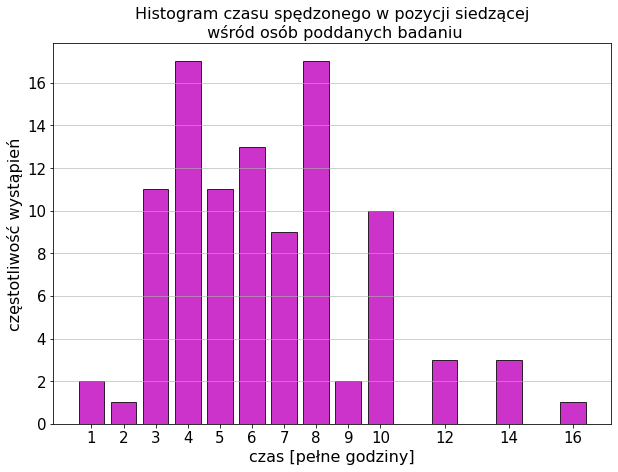

In [131]:
# Rysowanie histogramu wieku
plt.figure(figsize=(10,7))
plt.bar(bins.index, bins.values, alpha=0.8, color="m", edgecolor="k")
plt.xticks(bins.index) 
plt.grid(axis='y', alpha=0.75)
plt.xlabel("czas [pełne godziny]", FontSize='16')
plt.ylabel("częstotliwość wystąpień", FontSize='16')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Histogram czasu spędzonego w pozycji siedzącej\n wśród osób poddanych badaniu", FontSize='16')

# Zadanie na 4


In [132]:
# Wczytywanie danych
headings = ['index',
            'date',
            'height']

data = pd.read_csv('../dane/manaus.csv', names=headings, skiprows=1)
data = data[['date', 'height']]
data['height'] = data['height'].astype(float)
data

date   height
0     1903.000000 -1.12422
1     1903.083333 -1.16433
2     1903.166667 -1.34911
3     1903.250000 -0.94544
4     1903.333333 -0.65367
...           ...      ...
1075  1992.583333 -3.47167
1076  1992.666667 -1.94522
1077  1992.750000 -0.20289
1078  1992.833333 -0.83689
1079  1992.916667  0.31667

[1080 rows x 2 columns]

In [133]:
# Średnia wysokość 
avg = data['height'].mean()
avg

1.0185185185260135e-06

In [134]:
# Obliczenie liczby przedziałów
bins = int((data['height'].max() - data['height'].min()) * 10.0) 
bins

120

In [135]:
# Sprawdzenie, czy dane są zgodne z rozkładem normalnym
k2, p = stats.normaltest(data["height"])
alpha = 0.05
print("p-Value: {}".format(p))
if (p > alpha):
    print("Dane posiadają rozkład normalny")
else:
    print("Dane nie posiadają rozkładu normalnego")
    

p-Value: 1.5503054748471935e-17
Dane nie posiadają rozkładu normalnego


Text(0.5, 1.0, 'Histogram poziomu wody w rzece Manaus\n w latach 1903-1992')

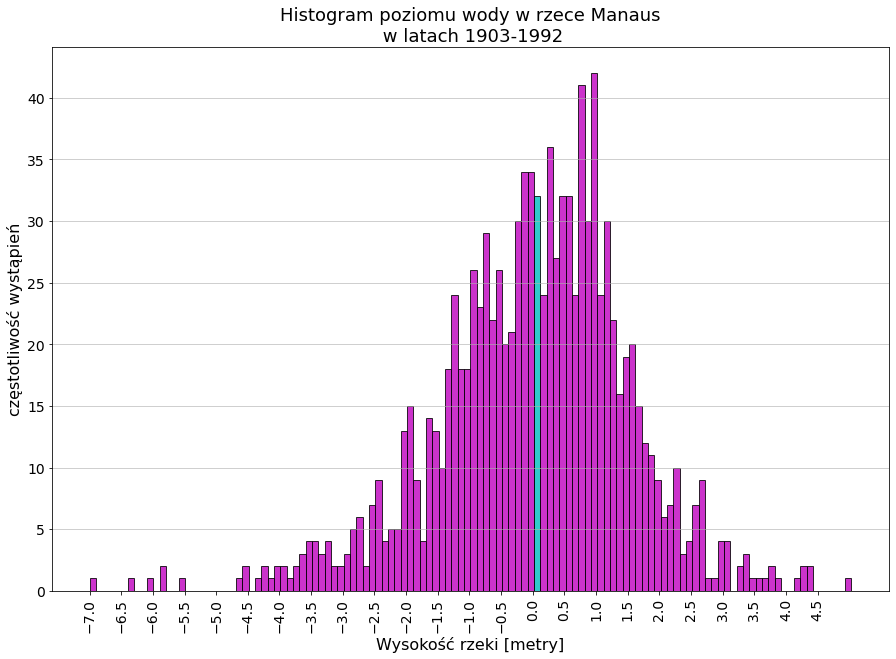

In [136]:
# Rysowanie histogramu poziomu wody w rzece Manaus
plt.figure(figsize=(15,10))
plt.xticks(np.arange(data['height'].min().round(1), data['height'].max().round(1), 0.5)) 
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.xlabel("Wysokość rzeki [metry]", FontSize='16')
plt.ylabel("częstotliwość wystąpień", FontSize='16')
N, bins, patches = plt.hist(data['height'].values, bins=bins, alpha=0.8, color="m", edgecolor="k")
index = (np.abs(bins-0.0)).argmin()
patches[index].set_fc('c')
plt.grid(axis='y', alpha=0.75)
plt.title("Histogram poziomu wody w rzece Manaus\n w latach 1903-1992", FontSize='18')

# Zadanie na 5

In [2]:
# Wczytywanie danych
headings = ['index',
            'sex',
            'bodyweight',
            'heartweight']

data = pd.read_csv('../dane/cats.csv', names=headings, skiprows=1)
data = data[['sex', 'bodyweight', 'heartweight']]
data['bodyweight'] = data['bodyweight'].astype(float)
data['heartweight'] = data['heartweight'].astype(float)
data

sex  bodyweight  heartweight
0     F         2.0          7.0
1     F         2.0          7.4
2     F         2.0          9.5
3     F         2.1          7.2
4     F         2.1          7.3
..   ..         ...          ...
139   M         3.7         11.0
140   M         3.8         14.8
141   M         3.8         16.8
142   M         3.9         14.4
143   M         3.9         20.5

[144 rows x 3 columns]

In [3]:
data.groupby("sex")['heartweight'].describe()

count       mean       std  min   25%   50%   75%   max
sex                                                         
F     47.0   9.202128  1.357666  6.3  8.35   9.1  10.1  13.0
M     97.0  11.322680  2.542288  6.5  9.40  11.4  12.8  20.5

In [4]:
female = data[(data['sex'] == 'F')]
female.reset_index(inplace = True)

male = data[(data['sex'] == 'M')]
male.reset_index(inplace = True)

statistic, pvalue = stats.ttest_ind(female['heartweight'], male['heartweight'])

## https://pythonfordatascience.org/independent-t-test-python/

descriptives, results = rp.ttest(female['heartweight'], male['heartweight'])
results

Independent t-test   results
0  Difference (heartweight - heartweight) =    -2.1206
1                      Degrees of freedom =   142.0000
2                                       t =    -5.3539
3                   Two side test p value =     0.0000
4                  Difference < 0 p value =     0.0000
5                  Difference > 0 p value =     1.0000
6                               Cohen's d =    -0.9515
7                               Hedge's g =    -0.9465
8                           Glass's delta =    -1.5619
9                                       r =     0.4098

In [5]:
# Obliczenie liczby przedziałów dla wagi ciała
bodybins = int((data['bodyweight'].max() - data['bodyweight'].min()) * 10.0) 
bodybins

19

In [6]:
# Implementacja funkcji krzywej Gaussa
def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) / 4 / stddev)**2)


Text(0.5, 1.0, 'Histogram wagi ciała kotów')

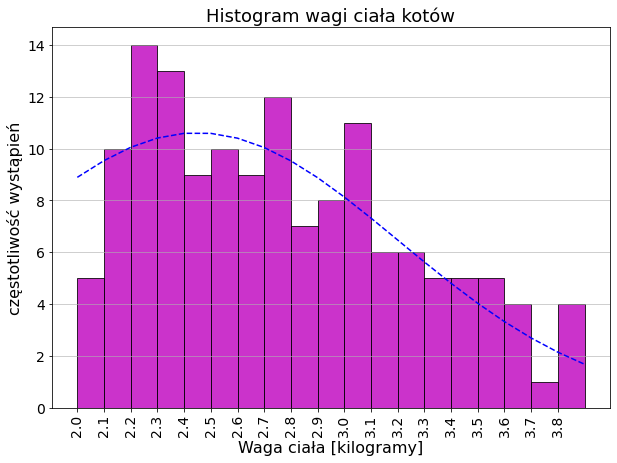

In [114]:
# Rysowanie histogramu wagi ciała kotów
plt.figure(figsize=(10,7))
plt.xticks(np.arange(data['bodyweight'].min(), data['bodyweight'].max(), 0.1)) 
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.xlabel("Waga ciała [kilogramy]", FontSize='16')
plt.ylabel("częstotliwość wystąpień", FontSize='16')
N, bins, patches = plt.hist(data['bodyweight'].values, bins=bodybins, alpha=0.8, color="m", edgecolor="k")

# Aproksymacja funkcją gaussowską
fitted_curve_parameters, _ = optimize.curve_fit(gaussian, bins[:len(bins)-1], N)
plt.plot(bins, gaussian(bins, *fitted_curve_parameters), '--', color="b")

plt.grid(axis='y', alpha=0.75)
plt.title("Histogram wagi ciała kotów", FontSize='18')

In [115]:
# Obliczenie liczby przedziałów dla wagi serca
heartbins = int((data['heartweight'].max() - data['heartweight'].min()) * 2.0) 
heartbins

28

29


Text(0.5, 1.0, 'Histogram wagi serca kotów')

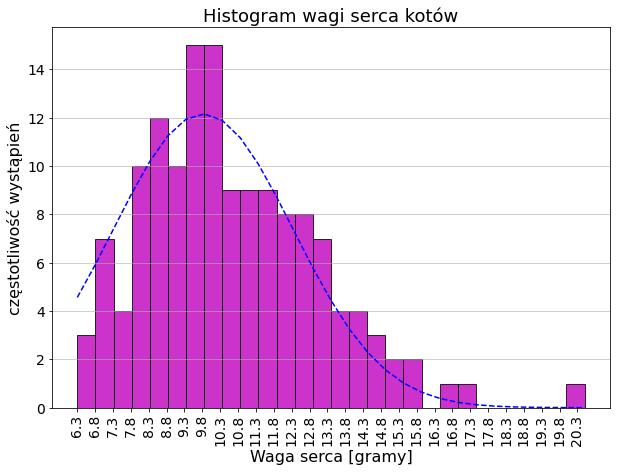

In [116]:
# Rysowanie histogramu wagi serca kotów
plt.figure(figsize=(10,7))
plt.xticks(np.arange(data['heartweight'].min(), data['heartweight'].max(), 0.5))

print(len(np.arange(data['heartweight'].min(), data['heartweight'].max(), 0.5)))
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.xlabel("Waga serca [gramy]", FontSize='16')
plt.ylabel("częstotliwość wystąpień", FontSize='16')
N, bins, patches = plt.hist(data['heartweight'].values, bins=heartbins, alpha=0.8, color="m", edgecolor="k")

# Aproksymacja funkcją gaussowską
fitted_curve_parameters, _ = optimize.curve_fit(gaussian, bins[:len(bins)-1], N)
plt.plot(bins, gaussian(bins, *fitted_curve_parameters), '--', color="b")

plt.grid(axis='y', alpha=0.75)
plt.title("Histogram wagi serca kotów", FontSize='18')

In [117]:
# Rysowanie histogramu wagi serca kotów (dziewczynki)
plt.figure(figsize=(10,7))
plt.xticks(np.arange(female['heartweight'].min(), female['heartweight'].max(), 0.5)) 
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.xlabel("Waga serca [gramy]", FontSize='16')
plt.ylabel("częstotliwość wystąpień", FontSize='16')
N, bins, patches = plt.hist(female['heartweight'].values, bins=heartbins, alpha=0.8, color="m", edgecolor="k")

fitted_curve_parameters, _ = optimize.curve_fit(gaussian, bins[:len(bins)-1], N)
plt.plot(bins, gaussian(bins, *fitted_curve_parameters), '--', color="b")

plt.grid(axis='y', alpha=0.75)
plt.title("Histogram wagi serca kotów (samice)", FontSize='18')

Text(0.5, 1.0, 'Histogram wagi serca kotów (samice)')

In [118]:
# Rysowanie histogramu wagi serca kotów (chłopcy)
plt.figure(figsize=(10,7))
plt.xticks(np.arange(male['heartweight'].min(), male['heartweight'].max(), 0.5)) 
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.xlabel("Waga serca [gramy]", FontSize='16')
plt.ylabel("częstotliwość wystąpień", FontSize='16')
N, bins, patches = plt.hist(male['heartweight'].values, bins=heartbins, alpha=0.8, color="m", edgecolor="k")

fitted_curve_parameters, _ = optimize.curve_fit(gaussian, bins[:len(bins)-1], N)
plt.plot(bins, gaussian(bins, *fitted_curve_parameters), '--', color="b")

plt.grid(axis='y', alpha=0.75)
plt.title("Histogram wagi serca kotów (samce)", FontSize='18')

Text(0.5, 1.0, 'Histogram wagi serca kotów (samce)')